In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\Users\user\Desktop\Jupyter\Datasets\skin_canc\hmnist_28_28_RGB.csv')
df

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,183,165,181,182,165,180,184,166,182,188,...,208,185,187,208,186,186,206,187,189,0
10011,2,3,1,38,33,32,121,104,103,132,...,96,79,76,24,23,21,3,4,1,0
10012,132,118,118,167,149,149,175,156,160,184,...,204,181,178,181,159,153,172,151,145,0
10013,160,124,146,164,131,152,167,127,146,169,...,185,162,167,184,157,166,185,162,172,0


In [3]:
y = df['label']
y

0        2
1        2
2        2
3        2
4        2
        ..
10010    0
10011    0
10012    0
10013    0
10014    6
Name: label, Length: 10015, dtype: int64

In [4]:
X = df.drop(columns = ['label'])
X

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2342,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351
0,192,153,193,195,155,192,197,154,185,202,...,134,173,124,138,183,147,166,185,154,177
1,25,14,30,68,48,75,123,93,126,158,...,82,60,39,55,25,14,28,25,14,27
2,192,138,153,200,145,163,201,142,160,206,...,149,167,129,143,159,124,142,136,104,117
3,38,19,30,95,59,72,143,103,119,171,...,73,44,26,36,25,12,17,25,12,15
4,158,113,139,194,144,174,215,162,191,225,...,201,209,166,185,172,135,149,109,78,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,183,165,181,182,165,180,184,166,182,188,...,181,208,185,187,208,186,186,206,187,189
10011,2,3,1,38,33,32,121,104,103,132,...,129,96,79,76,24,23,21,3,4,1
10012,132,118,118,167,149,149,175,156,160,184,...,190,204,181,178,181,159,153,172,151,145
10013,160,124,146,164,131,152,167,127,146,169,...,165,185,162,167,184,157,166,185,162,172


In [5]:
X = np.array(X)
X

array([[192, 153, 193, ..., 185, 154, 177],
       [ 25,  14,  30, ...,  25,  14,  27],
       [192, 138, 153, ..., 136, 104, 117],
       ...,
       [132, 118, 118, ..., 172, 151, 145],
       [160, 124, 146, ..., 185, 162, 172],
       [175, 142, 121, ..., 175, 139, 126]], dtype=int64)

In [6]:
X_r = X.reshape(10015, 28, 28, 3)

In [24]:
X_r = X_r/255

(-0.5, 27.5, 27.5, -0.5)

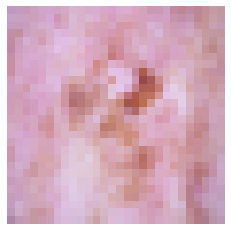

In [25]:
plt.imshow(X_r[0])
plt.axis('off')

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_r, y, test_size = 0.2 )

In [28]:
from keras.models import Model
from keras import Input

In [29]:
input1 = Input(shape = (28, 28, 3))

In [30]:
layer_1 = keras.layers.Conv2D(16, (3,3), activation = 'relu')(input1)
layer_2 = keras.layers.MaxPool2D(pool_size = (2,2), strides = 2)(layer_1)
layer_3 = keras.layers.Conv2D(32, (3, 3), activation ='relu', padding = 'same')(layer_2)
layer_4 = keras.layers.MaxPool2D(pool_size = (2,2), strides = 2)(layer_3)
layer_5 = keras.layers.Conv2D(64, (3, 3), activation ='relu', padding = 'same')(layer_4)
layer_6 = keras.layers.Conv2D(64, (3, 3), activation ='relu', padding = 'same')(layer_5)
layer_7 = keras.layers.MaxPool2D(pool_size = (2,2), strides = 2)(layer_6)

In [31]:
layer_f = keras.layers.Flatten()(layer_7)
layer_d1 = keras.layers.Dense(64, activation = 'relu')(layer_f)
layer_d2 = keras.layers.Dense(7, activation = 'softmax')(layer_d1)

In [32]:
model = Model(inputs = input1, outputs = layer_d2)

In [33]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 3)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 26, 26, 16)        448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 6, 6, 64)          1849

In [34]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [35]:
history = model.fit(X_train, y_train, epochs = 10, validation_data = (X_test, y_test))

Epoch 1/10
251/251 [==============================] - 7s 25ms/step - loss: 1.0287 - accuracy: 0.6690 - val_loss: 0.8965 - val_accuracy: 0.6875
Epoch 2/10
251/251 [==============================] - 6s 25ms/step - loss: 0.8697 - accuracy: 0.6837 - val_loss: 0.8450 - val_accuracy: 0.7039
Epoch 3/10
251/251 [==============================] - 7s 26ms/step - loss: 0.8397 - accuracy: 0.6878 - val_loss: 0.8186 - val_accuracy: 0.7004
Epoch 4/10
251/251 [==============================] - 6s 25ms/step - loss: 0.8166 - accuracy: 0.6956 - val_loss: 0.8109 - val_accuracy: 0.7114
Epoch 5/10
251/251 [==============================] - 7s 26ms/step - loss: 0.7834 - accuracy: 0.7053 - val_loss: 0.7587 - val_accuracy: 0.7224
Epoch 6/10
251/251 [==============================] - 6s 25ms/step - loss: 0.7570 - accuracy: 0.7179 - val_loss: 0.8023 - val_accuracy: 0.7079
Epoch 7/10
251/251 [==============================] - 6s 25ms/step - loss: 0.7218 - accuracy: 0.7323 - val_loss: 0.7261 - val_accuracy: 0.7374

In [19]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

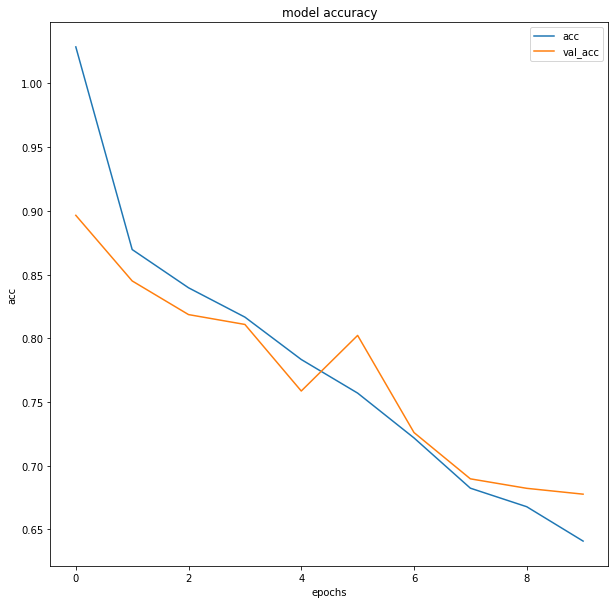

In [38]:
plt.figure(figsize = (10, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('acc')
plt.title('model accuracy')
plt.legend(['acc', 'val_acc'])

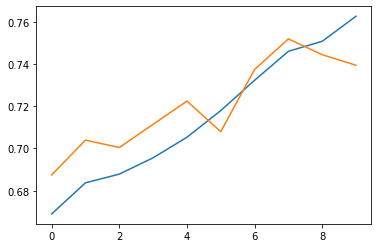

In [39]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()